In [1]:
from fastbook import *

In [2]:
from fastai.vision.all import *

In [3]:
default_dest = URLs.path("").with_suffix('')
default_dest

Path('/home/teeth/.fastai/archive')

In [5]:
path = Path("/home/teeth/.fastai/data/utkface/UTKFace")
fnames = get_image_files(path)
path, fnames

(Path('/home/teeth/.fastai/data/utkface/UTKFace'),
 (#23708) [Path('/home/teeth/.fastai/data/utkface/UTKFace/58_0_0_20170111171747501.jpg.chip.jpg'),Path('/home/teeth/.fastai/data/utkface/UTKFace/50_1_0_20170109012542626.jpg.chip.jpg'),Path('/home/teeth/.fastai/data/utkface/UTKFace/24_1_2_20170116165611580.jpg.chip.jpg'),Path('/home/teeth/.fastai/data/utkface/UTKFace/65_0_0_20170117185953586.jpg.chip.jpg'),Path('/home/teeth/.fastai/data/utkface/UTKFace/29_0_1_20170113150655423.jpg.chip.jpg'),Path('/home/teeth/.fastai/data/utkface/UTKFace/1_1_2_20161219151131108.jpg.chip.jpg'),Path('/home/teeth/.fastai/data/utkface/UTKFace/1_0_0_20170110211535352.jpg.chip.jpg'),Path('/home/teeth/.fastai/data/utkface/UTKFace/45_0_3_20170119202051271.jpg.chip.jpg'),Path('/home/teeth/.fastai/data/utkface/UTKFace/43_0_0_20170111181750399.jpg.chip.jpg'),Path('/home/teeth/.fastai/data/utkface/UTKFace/76_1_1_20170110182035970.jpg.chip.jpg')...])

https://susanqq.github.io/UTKFace/
The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg

[age] is an integer from 0 to 116, indicating the age
[gender] is either 0 (male) or 1 (female)
[race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
[date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [9]:
eth = re.search(r'^\d+_(\d)+_', "39_1_20170116174525125.jpg.chip.jpg").group(1)
i2Ethnicity[int(eth)]

'Black'

(200, 200)


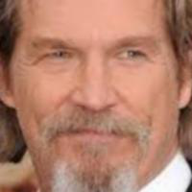

In [11]:
img = PILImage.create(fnames[3])
print(img.size)
img.to_thumb(192)

In [13]:
i2Ethnicity = { 0: "White", 1: "Black", 2: "Asian", 3: "Indian", 4: "Others"}
def label_func(file_path):
    return i2Ethnicity[int(re.search(r'^\d+_(\d)+_', os.path.basename(file_path)).group(1))]

In [14]:
dls = ImageDataLoaders.from_path_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=label_func, item_tfms=Resize(192))

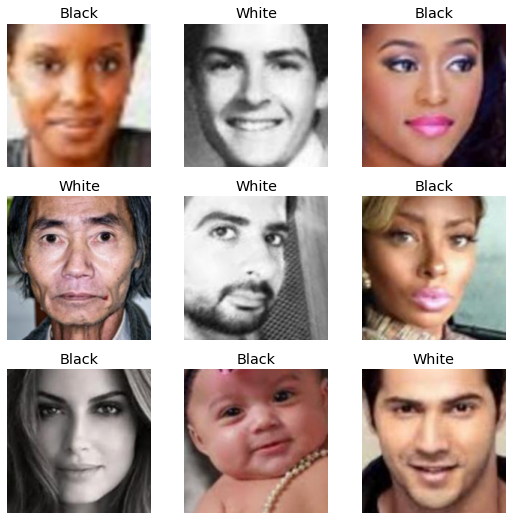

In [15]:
dls.show_batch()

In [37]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.502080,0.399507,0.183295,01:17


epoch,train_loss,valid_loss,error_rate,time
0,0.246532,0.215888,0.086058,01:49


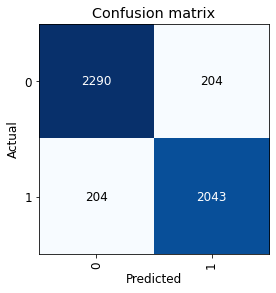

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

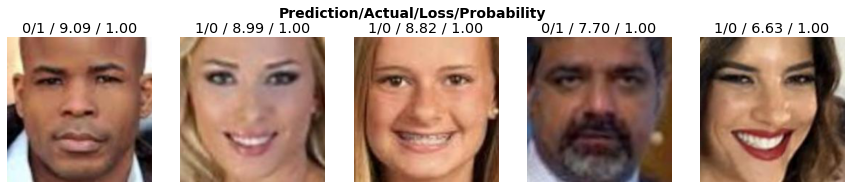

In [40]:
interp.plot_top_losses(5, nrows=1)